In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

The ABC Company produces screws with a __target length of 100__ millimeters (mm).
The length of the screws follows a __Normal Distribution__ with a (population) __standard deviation of 2 mm__.<br><br>
The machines need to be cleaned and recalibrated once a week. After the cleaning/recalibration process, ABC produces a sample of 20 screws to check whether the machines are correctly calibrated (__mean length = 100 mm__).<br> <br>
After the most recent calibration you suspect that the machines are incorrectly calibrated. Based on the drawn sample (__sample size = 20__) with __sample mean 100.929__ mm, test on a __2% level of significance__, whether the machine is correctly calibrated or corrupted (two-tailed).
<br><br>Calculate the __z-statistic__ and the __p-value__ of your test.

In [8]:
mu=100.7 #unknown
popstd=2 #unknown

In [4]:
sample_size=20

In [9]:
np.random.seed(123)
sample=np.random.normal(loc=mu,scale=popstd,size=sample_size)

In [10]:
sample

array([ 98.52873879, 102.69469089, 101.265957  ,  97.68741057,
        99.5427995 , 104.00287307,  95.84664151,  99.84217474,
       103.23187252,  98.9665192 ,  99.3422277 , 100.51058206,
       103.68277925,  99.42219601,  99.81203608,  99.83129745,
       105.11186017, 105.07357218, 102.7081078 , 101.4723728 ])

In [11]:
POE=sample.mean()
POE

100.92883546391059

In [13]:
stderror=popstd/np.sqrt(sample_size)
stderror

0.4472135954999579

HO: MEAN=100

Ha:mean != 100

In [14]:
H0=100

10% SIG level:

In [15]:
conf=0.90

In [17]:
left,right=stats.norm.interval(conf,loc=H0,scale=stderror)

In [18]:
left

99.26439909541989

In [19]:
right

100.73560090458011

In [20]:
POE

100.92883546391059

In [21]:
x=np.linspace(96,104,1000)
y=stats.norm.pdf(x,loc=H0,scale=stderror)

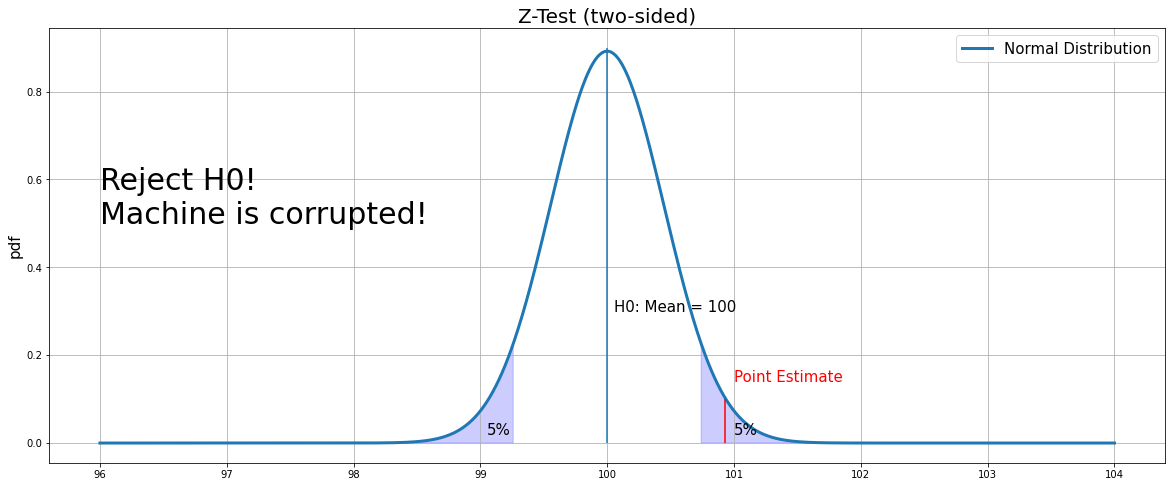

In [23]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Normal Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 0.90)
plt.vlines(x = POE, ymin = 0, ymax = 0.1, color = "red")
plt.fill_between(x, y, where = ((x > right) | (x < left)), color = "blue", alpha = 0.2)
plt.annotate("5%", xy = (99.05, 0.02), fontsize = 15)
plt.annotate("5%", xy = (101, 0.02), fontsize = 15)
plt.annotate("Reject H0!\nMachine is corrupted!", xy = (96, 0.5), fontsize = 30)
plt.annotate("H0: Mean = 100", xy = (100.05, 0.3), fontsize = 15)
plt.annotate("Point Estimate", xy = (101, 0.14), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# 2% SIG LEVEL:

In [24]:
conf=0.98

In [29]:
left,right=stats.norm.interval(conf,loc=H0,scale=stderror)

In [26]:
x=np.linspace(96,104,1000)
y=stats.norm.pdf(x,loc=H0,scale=stderror)

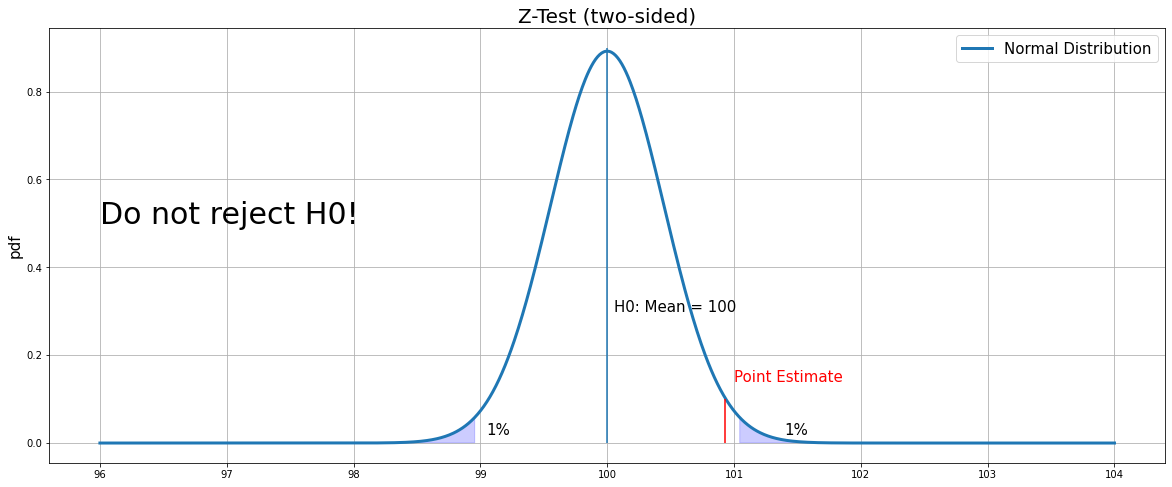

In [30]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Normal Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 0.90)
plt.vlines(x = POE, ymin = 0, ymax = 0.1, color = "red")
plt.fill_between(x, y, where = ((x > right) | (x < left)), color = "blue", alpha = 0.2)
plt.annotate("1%", xy = (99.05, 0.02), fontsize = 15)
plt.annotate("1%", xy = (101.4, 0.02), fontsize = 15)
plt.annotate("Do not reject H0!", xy = (96, 0.5), fontsize = 30)
plt.annotate("H0: Mean = 100", xy = (100.05, 0.3), fontsize = 15)
plt.annotate("Point Estimate", xy = (101, 0.14), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# CALCULATING Z AND P VALUE

In [32]:
z=(POE-H0)/stderror
z

2.0769392372166267

In [35]:
stats.norm.cdf(-abs(z))

0.01890358386435081

In [38]:
p=2*stats.norm.cdf(-abs(z))

In [39]:
p

0.03780716772870162

In [41]:
x=np.linspace(-4,4,1000)
y=stats.norm.pdf(x)

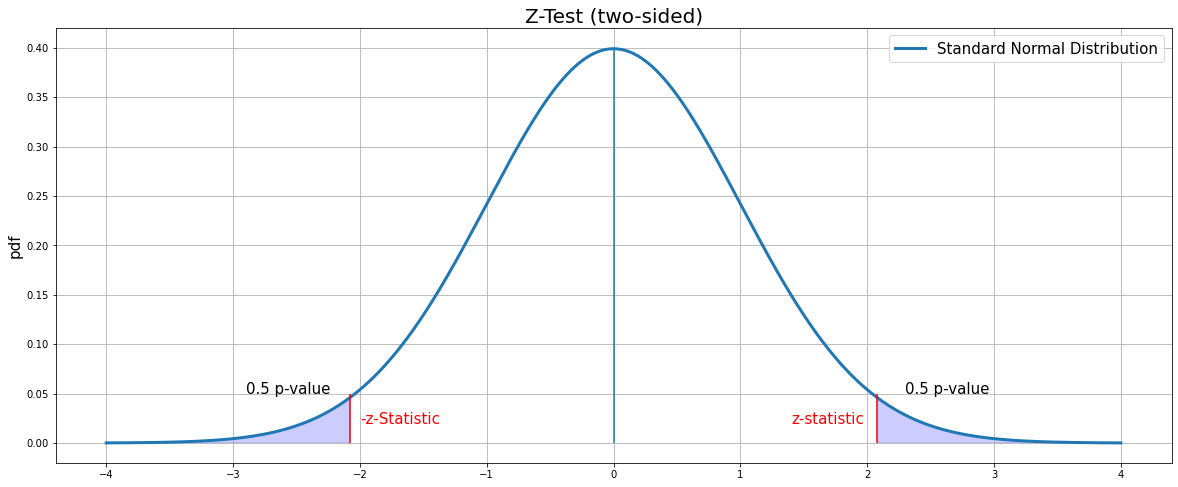

In [44]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Standard Normal Distribution")
plt.vlines(x = 0, ymin = 0, ymax = 0.40)
plt.vlines(x = z, ymin = 0, ymax = 0.05, color = "red")
plt.vlines(x = -z, ymin = 0, ymax = 0.05, color = "red")
plt.fill_between(x, y, where = ((x > abs(z)) | (x < -abs(z))), color = "blue", alpha = 0.2)
plt.annotate("0.5 p-value", xy = (-2.9, 0.05), fontsize = 15)
plt.annotate("0.5 p-value", xy = (2.3, 0.05), fontsize = 15)
plt.annotate("-z-Statistic", xy = (-2, 0.02), color = "red", fontsize = 15)
plt.annotate("z-statistic", xy = (1.4, 0.02), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# ONE TAILED Z TEST 

In [45]:
sample

array([ 98.52873879, 102.69469089, 101.265957  ,  97.68741057,
        99.5427995 , 104.00287307,  95.84664151,  99.84217474,
       103.23187252,  98.9665192 ,  99.3422277 , 100.51058206,
       103.68277925,  99.42219601,  99.81203608,  99.83129745,
       105.11186017, 105.07357218, 102.7081078 , 101.4723728 ])

In [46]:
sample_size

20

In [47]:
POE

100.92883546391059

In [48]:
stderror

0.4472135954999579

In [49]:
conf=0.95

In [53]:
right = stats.norm.ppf(conf,loc=H0,scale=stderror)

In [57]:
x=np.linspace(96,104,1000)
y=stats.norm.pdf(x,loc=H0,scale=stderror)

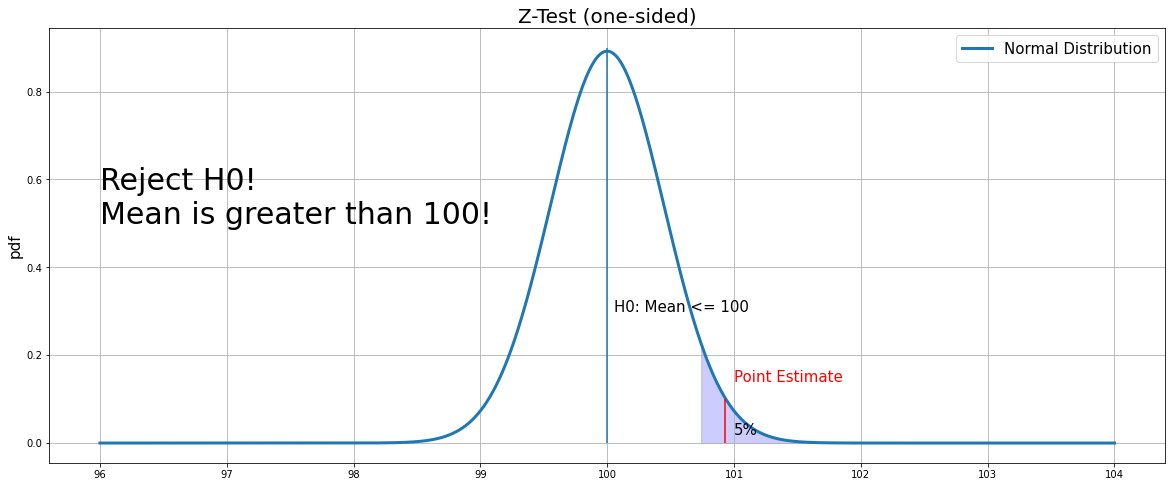

In [58]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Normal Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 0.90)
plt.vlines(x = POE, ymin = 0, ymax = 0.1, color = "red")
plt.fill_between(x, y, where = ((x > right)), color = "blue", alpha = 0.2)
plt.annotate("5%", xy = (101, 0.02), fontsize = 15)
plt.annotate("Reject H0!\nMean is greater than 100!", xy = (96, 0.5), fontsize = 30)
plt.annotate("H0: Mean <= 100", xy = (100.05, 0.3), fontsize = 15)
plt.annotate("Point Estimate", xy = (101, 0.14), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (one-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [60]:
z=(POE-H0)/stderror
z

2.0769392372166267

In [61]:
p=stats.norm.cdf(-abs(z))
p

0.01890358386435081

# TWO SIDED T UNKNOWN VARIANCE

The S&P 500, or just the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The S&P 500 is a capitalization-weighted index and the performance of the 10 largest companies in the index account for 21.8% of the performance of the index. <br> <br>
You have a random sample with 50 stocks/companies and their annual returns for the year 2017 (__sample size = 50__). <br>Test on a __5% level of significance__, whether the (equally-weighted) mean return for the whole S&P 500 population for the year 2017 is __equal to 0%__ or not. Calculate the t-statistic and the p-value of your test.<br> <br>  Assume a __sample mean of 25.32%__ and a __sample standard deviation of 30.50%__. 

__H0:__ The mean return is equal to 0%. <br> 
__Ha:__ The mean return is unequal to 0%.

In [64]:
sample=np.loadtxt('C:/Users/aheed/Desktop/sample.csv', delimiter=",",usecols=1)

In [65]:
sample

array([ 0.41576819,  0.15943993,  0.48012232,  0.57522782, -0.03451387,
        0.13844277,  0.17431897,  0.37182448,  0.34250291,  0.06699958,
        0.0982179 , -0.01147507,  0.49115226,  0.10660878,  0.94879205,
       -0.12201533,  0.04721855, -0.07336731,  0.2923796 ,  0.70641987,
        0.42263036,  0.38171074, -0.12320499,  0.24007071,  0.19244604,
        0.25205737, -0.00221189,  0.89433453, -0.09650582,  0.20288154,
        0.09163142,  0.37535726,  0.10399562,  0.18938513, -0.12747465,
        0.14833447,  0.24391856,  0.2305725 , -0.09347443,  1.32300163,
        0.11514778,  0.70218553,  0.35575652, -0.00843012,  0.50274579,
        0.26261244,  0.12447579, -0.09328358, -0.02459508,  0.69915894])

In [66]:
sample_size=sample.size
sample_size

50

In [67]:
poe=sample.mean()
poe

0.25318589009450754

In [68]:
stderror=sample.std(ddof=1)/np.sqrt(sample_size)
stderror

0.04312863904037249

5% SIG LEVEL

In [69]:
H0=0
conf=0.95

In [70]:
left,right=stats.t.interval(conf,loc=H0,scale=stderror,df=49)


In [71]:
left

-0.086670244912757

In [72]:
right

0.086670244912757

In [73]:
poe

0.25318589009450754

POE IS NOT BETWEEN THE LEFT AND RIGHT VALUES SO WE CAN REJECT NULL

In [77]:
x=np.linspace(-.2,.2,1000)
y=stats.t.pdf(x,loc=H0,scale=stderror,df=49)

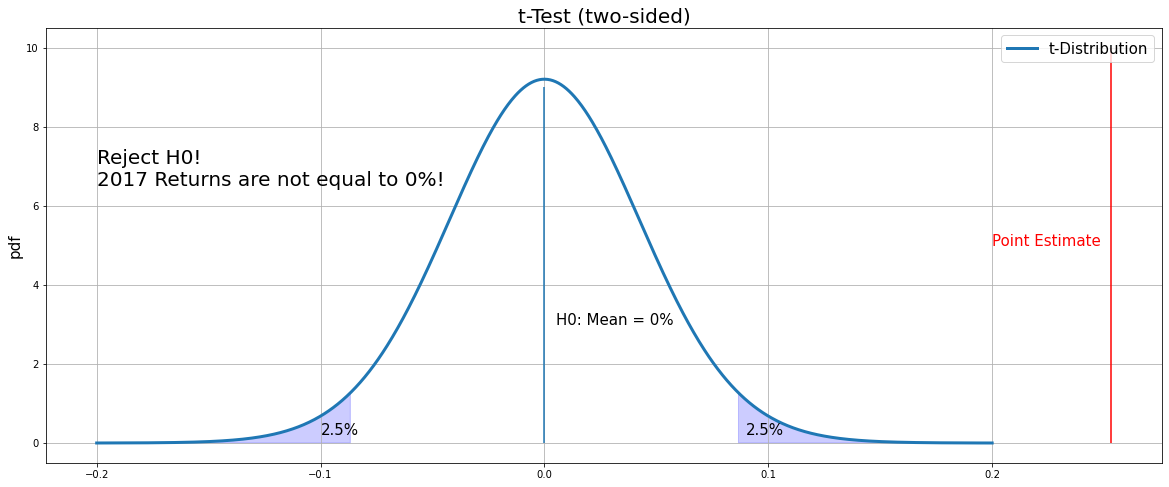

In [78]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "t-Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 9)
plt.vlines(x = poe, ymin = 0, ymax = 10, color = "red")
plt.fill_between(x, y, where = ((x > right) | (x < left)), color = "blue", alpha = 0.2)
plt.annotate("2.5%", xy = (-0.1, 0.2), fontsize = 15)
plt.annotate("2.5%", xy = (0.09, 0.2), fontsize = 15)
plt.annotate("Reject H0!\n2017 Returns are not equal to 0%!", xy = (-0.2, 6.5), fontsize = 20)
plt.annotate("H0: Mean = 0%", xy = (0.005, 3), fontsize = 15)
plt.annotate("Point Estimate", xy = (0.2, 5), color = "red",fontsize = 15)
plt.grid()
plt.title("t-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [79]:
t=(poe-H0)/stderror
t

5.8704817895482755

In [81]:
p_value=2*stats.t.cdf(-abs(t),df=49)

In [82]:
p_value

3.703114209694338e-07

In [84]:
format(p_value,'.10f')

'0.0000003703'

In [86]:
t,p_value=stats.ttest_1samp(sample,H0)

In [87]:
t

5.8704817895482755

In [88]:
p_value

3.703114209694338e-07

# ONE TAILED T TEST 

You have a random sample with 50 stocks/companies and their annual returns for the year 2017 (__sample size = 50__). Test on a __5% level of significance__, whether the (equally-weighted) mean return for the whole S&P 500 population for the year 2017 is __equal to or less than 15%__ (H0). Assume a sample mean of 25.32% and a sample standard deviation of 30.50%. Calculate the t-statistic and the p-value of your test.

__H0:__ The mean return is equal to or less than 15%. <br> 
__Ha:__ The mean return is greater than 15%

In [90]:
sample

array([ 0.41576819,  0.15943993,  0.48012232,  0.57522782, -0.03451387,
        0.13844277,  0.17431897,  0.37182448,  0.34250291,  0.06699958,
        0.0982179 , -0.01147507,  0.49115226,  0.10660878,  0.94879205,
       -0.12201533,  0.04721855, -0.07336731,  0.2923796 ,  0.70641987,
        0.42263036,  0.38171074, -0.12320499,  0.24007071,  0.19244604,
        0.25205737, -0.00221189,  0.89433453, -0.09650582,  0.20288154,
        0.09163142,  0.37535726,  0.10399562,  0.18938513, -0.12747465,
        0.14833447,  0.24391856,  0.2305725 , -0.09347443,  1.32300163,
        0.11514778,  0.70218553,  0.35575652, -0.00843012,  0.50274579,
        0.26261244,  0.12447579, -0.09328358, -0.02459508,  0.69915894])

In [91]:
sample.size

50

In [92]:
poe

0.25318589009450754

In [93]:
stderror

0.04312863904037249

In [94]:
h0=.15

In [95]:
t,p_value=stats.ttest_1samp(sample,h0)

In [96]:
t

2.3925144032000585

In [98]:
p_value #THIS IS THE VALUE OF TWO TAILED SO DIVIDE IT BY 2
p_value=p_value/2

p_value

0.010306114330592458

# HYPOTHESIS WITH BOOTSTRAPPING

The S&P 500, or just the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The S&P 500 is a capitalization-weighted index and the performance of the 10 largest companies in the index account for 21.8% of the performance of the index. <br> <br>
You have a random sample with 50 stocks/companies and their annual returns for the year 2017 (__sample size = 50__). <br>Test on a __5% level of significance__, whether the (equally-weighted) mean return for the whole S&P 500 population for the year 2017 is __equal to 15%__ or not. Calculate the t-statistic and the p-value of your test.<br> <br>  Assume a __sample mean of 25.32%__ and a __sample standard deviation of 30.50%__.  

__H0:__ The mean return is equal to 15%. <br> 
__Ha:__ The mean return is unequal to 15%.

In [99]:
h0=.15

In [100]:
sample

array([ 0.41576819,  0.15943993,  0.48012232,  0.57522782, -0.03451387,
        0.13844277,  0.17431897,  0.37182448,  0.34250291,  0.06699958,
        0.0982179 , -0.01147507,  0.49115226,  0.10660878,  0.94879205,
       -0.12201533,  0.04721855, -0.07336731,  0.2923796 ,  0.70641987,
        0.42263036,  0.38171074, -0.12320499,  0.24007071,  0.19244604,
        0.25205737, -0.00221189,  0.89433453, -0.09650582,  0.20288154,
        0.09163142,  0.37535726,  0.10399562,  0.18938513, -0.12747465,
        0.14833447,  0.24391856,  0.2305725 , -0.09347443,  1.32300163,
        0.11514778,  0.70218553,  0.35575652, -0.00843012,  0.50274579,
        0.26261244,  0.12447579, -0.09328358, -0.02459508,  0.69915894])

In [101]:
sample.size

50

In [120]:
poe=sample.mean()
poe

0.25318589009450754

In [103]:
sims=1000000

In [104]:
np.random.seed(123)
bootstrap=[]
for i in range(sims):
    bootstrap.append(np.random.choice(sample,size=sample_size,replace=True).mean())


In [106]:
len(bootstrap)

1000000

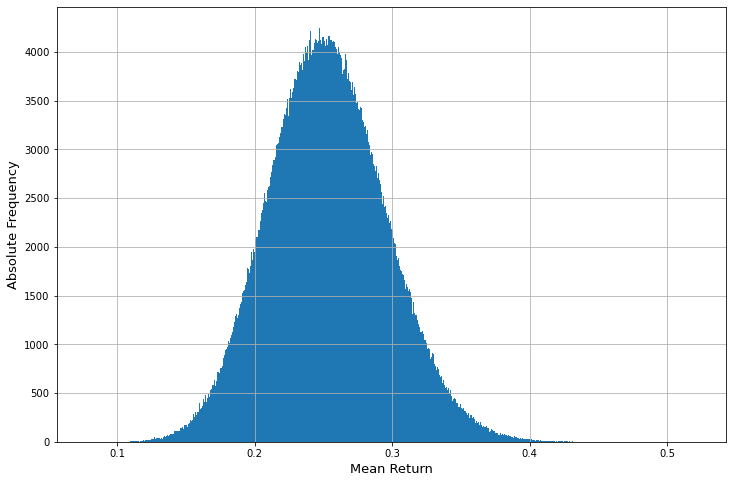

In [107]:
plt.figure(figsize = (12, 8))
plt.hist(bootstrap, bins = 1000)
plt.grid()
plt.ylabel("Absolute Frequency", fontsize = 13)
plt.xlabel("Mean Return", fontsize = 13)
plt.show()

In [108]:
bootstrap_a=np.array(bootstrap)

In [109]:
boot_mean=bootstrap_a.mean()
boot_mean

0.253210623589076

In [110]:
shift=bootstrap_a-boot_mean+h0


In [111]:
shift

array([0.16431518, 0.2111521 , 0.11906135, ..., 0.15529205, 0.18305159,
       0.12544671])

In [112]:
shift.mean()

0.15000000000000005

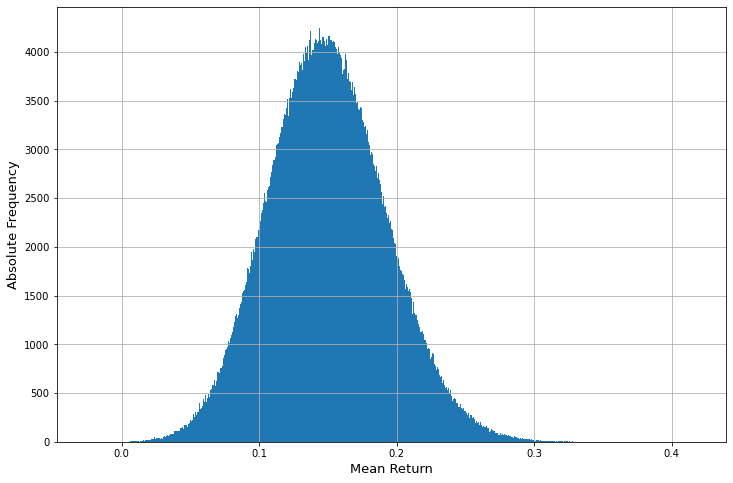

In [114]:
plt.figure(figsize = (12, 8))
plt.hist(shift, bins = 1000)
plt.grid()
plt.ylabel("Absolute Frequency", fontsize = 13)
plt.xlabel("Mean Return", fontsize = 13)
plt.show()

In [119]:
(shift >= poe).mean()

0.011048

In [117]:
p=2*(shift>=poe).mean()
p

0.022096

In [118]:
stats.ttest_1samp(sample,h0)

Ttest_1sampResult(statistic=2.3925144032000585, pvalue=0.020612228661184916)

# TEST FOR NORMALITY RETURNS

In [121]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
np.set_printoptions(precision=2, suppress= True)

In [122]:
pop=np.loadtxt('C:/Users/aheed/Desktop/SP500.csv', delimiter=",",usecols=1)

In [123]:
pop

array([ 0.47,  0.11, -0.41,  0.46,  0.54,  0.17,  0.66,  0.49,  0.31,
        0.7 ,  0.23, -0.12,  0.14,  0.11,  0.42,  0.12,  0.17, -0.07,
        0.26, -0.22, -0.09, -0.04,  0.09,  0.22, -0.02,  0.49,  1.31,
       -0.17,  0.41,  0.24, -0.02,  0.58,  0.11, -0.09,  0.49,  0.41,
        0.19,  0.53,  0.35,  0.56,  1.43,  0.6 ,  0.57,  0.2 ,  0.29,
       -0.33,  0.14,  0.31,  0.5 ,  0.18,  0.47,  0.16,  0.75,  0.01,
        0.45,  0.64,  0.26,  0.34, -0.1 ,  0.89,  0.34,  0.46,  0.06,
        0.6 ,  0.29,  0.09,  0.53, -0.51,  0.12,  0.14,  0.19,  0.35,
        0.01,  0.05,  0.37,  0.22,  0.15,  0.3 ,  0.03,  0.25, -0.05,
       -0.15,  0.7 ,  0.11,  0.69,  0.38, -0.07,  0.28,  0.27,  0.66,
        0.33,  0.36, -0.1 ,  0.42,  0.35,  0.18,  0.14,  0.22,  0.17,
        0.52, -0.01,  0.15,  0.24,  0.27,  0.16,  0.27, -0.23,  0.29,
        0.14,  0.79,  0.15,  0.14,  0.22,  0.25,  0.09,  0.16,  0.09,
       -0.2 ,  0.46,  0.56,  0.49,  0.27,  0.53,  0.35, -0.3 ,  0.27,
        0.24, -0.08,

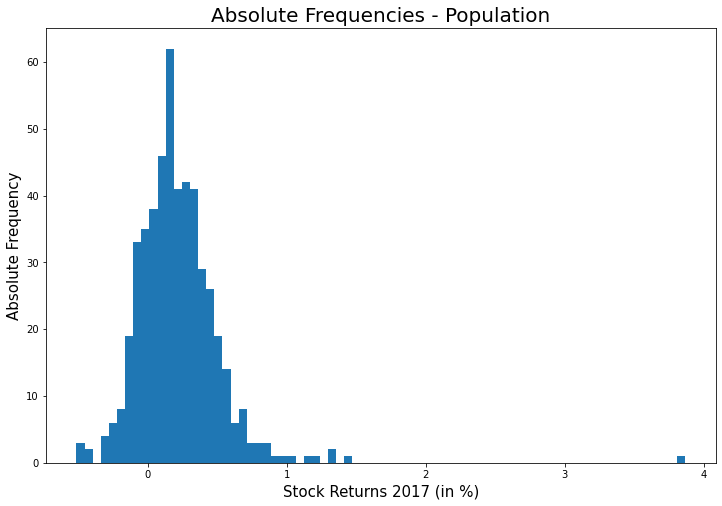

In [124]:
plt.figure(figsize = (12, 8))
plt.hist(pop, bins = 75)
plt.title("Absolute Frequencies - Population", fontsize = 20)
plt.xlabel("Stock Returns 2017 (in %)", fontsize = 15)
plt.ylabel("Absolute Frequency", fontsize = 15)
plt.show()

In [125]:
pop.mean()

0.2178034799900395

In [126]:
pop.std()

0.31026301889153196

In [127]:
stats.skew(pop)

3.692155663129147

In [128]:
stats.kurtosis(pop)

38.01022437524734

In [129]:
sims=1000000

In [131]:
kurtosis=[]
np.random.seed(123)
for i in range(sims):
    kurtosis.append(stats.kurtosis(np.random.normal(size=500)))

In [133]:
len(kurtosis)

1000000

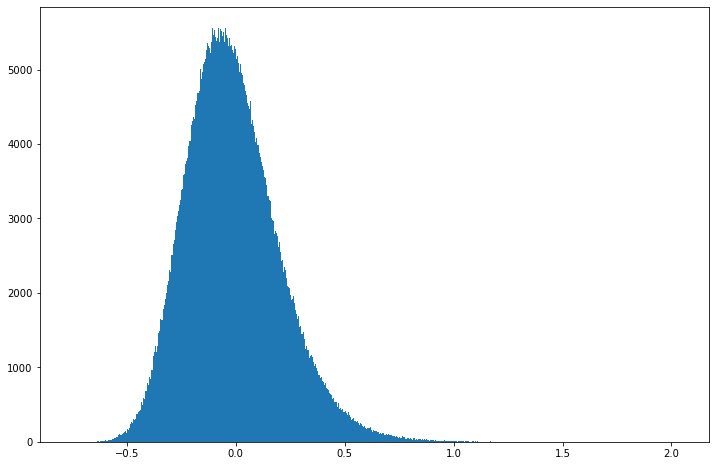

In [135]:
plt.figure(figsize=(12,8))
plt.hist(kurtosis,bins=1000)
plt.show()

In [138]:
z,p_Value=stats.kurtosistest(pop)

In [139]:
z

13.25931924797942

In [140]:
p_Value

3.984966836226268e-40

In [142]:
format(p_Value,'.41f')

'0.00000000000000000000000000000000000000040'

In [143]:
stats.skewtest(pop)

SkewtestResult(statistic=16.94983170028087, pvalue=1.93005484654472e-64)

In [144]:
stats.normaltest(pop)

NormaltestResult(statistic=463.1063415876838, pvalue=2.739905959763301e-101)